In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df.drop(columns=['Serial No.'],inplace=True)

In [4]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-07-21 10:05:18.287047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 10:05:18.287119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 10:05:18.288710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [18]:
y_train

238    0.70
438    0.67
475    0.59
58     0.36
380    0.78
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
X_train_scaled.shape

(400, 7)

In [20]:
history = model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.5448 - val_loss: 0.5306
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4578 - val_loss: 0.4405
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3833 - val_loss: 0.3598
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3030 - val_loss: 0.2829
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2346 - val_loss: 0.2065
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1661 - val_loss: 0.1247
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0952 - val_loss: 0.0555
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0401 - val_loss: 0.0150
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [21]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8061519095247143

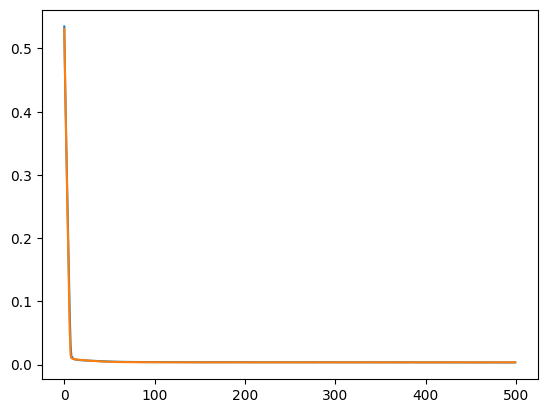

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])